# OIL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "./filtered_data/Crude Oil WTI Futures Historical Data.csv"
df_oil = pd.read_csv(file_path)
df_oil.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-12-29,71.84,72.15,72.80,71.47,63.48K,-0.18%
1,2023-12-28,71.97,74.04,74.62,71.92,94.29K,-3.19%
2,2023-12-27,74.34,75.57,75.81,74.01,80.38K,-1.81%
3,2023-12-26,75.71,73.74,76.31,73.32,56.76K,2.60%
4,2023-12-22,73.73,74.07,75.11,73.55,76.79K,-0.45%


- 날짜를 기준으로 정렬한다
- 거래량과 변동률을 제외하고 칼만 필터를 적용한다

In [2]:
df_oil["Date"] = pd.to_datetime(df_oil["Date"])
df_oil = df_oil.sort_values(by="Date")

In [3]:
selected_features = ["Price", "Open", "High", "Low"]

# Kalman Filter
filtered_data = df_oil.copy()
for feature in selected_features:
    prices = df_oil[feature].values

    # 초기 상태 설정
    n = len(prices)
    x_est = np.zeros(n)  # 필터링된 상태 추정값
    P_est = np.zeros(n)  # 오차 공분산
    x_est[0] = prices[0] # 초기 상태값
    P_est[0] = 1

    # 칼만 필터 파라미터 설정
    A = 1     # 상태 전이 행렬
    H = 1     # 측정 행렬
    Q = 1e-5  # 프로세스 노이즈 공분산
    R = 0.1   # 츠겅 노이즈 공분산

    # 칼만 필터 적용 (예측 및 갱신 과정 반봅)
    for k in range(1, n):
        x_pred = A * x_est[k-1]
        P_pred = A * P_est[k-1] * A + Q

        # K, 칼만 이득 계산
        K = P_pred * H / (H * P_pred * H + R)

        # 갱신 단계
        x_est[k] = x_pred + K * (prices[k] - H * x_pred)
        P_est[k] = (1 - K * H) * P_pred
    
    # 필터링된 데이터 저장
    filtered_data[feature] = x_est

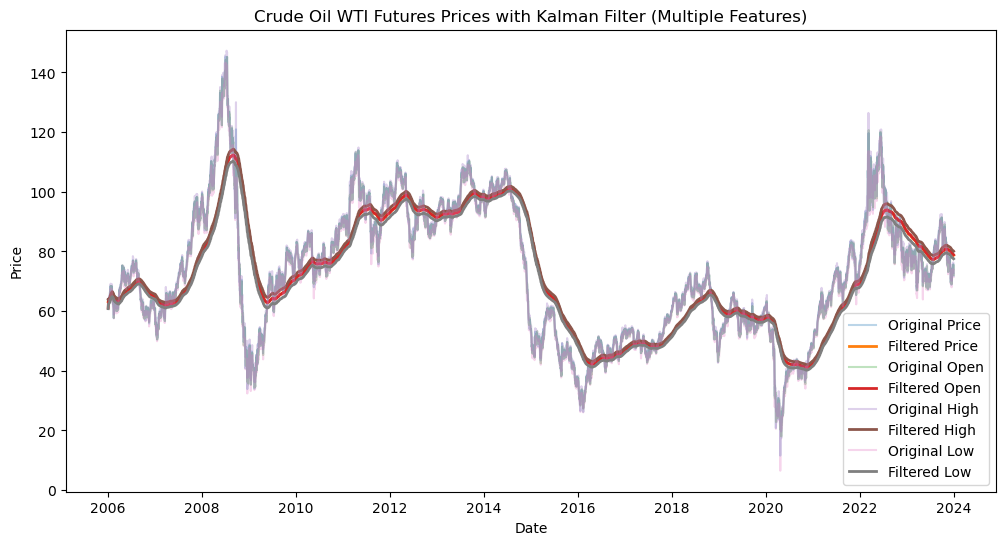

In [4]:
# 결과 시각화 (원본 데이터 vs 칼만 필터 적용 데이터)
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.plot(df_oil["Date"], df_oil[feature], alpha=0.3, label=f"Original {feature}")
    plt.plot(df_oil["Date"], filtered_data[feature], label=f"Filtered {feature}", linewidth=2)

plt.legend()
plt.title("Crude Oil WTI Futures Prices with Kalman Filter (Multiple Features)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [5]:
print(filtered_data.isnull().sum())
filtered_data.to_csv("./Kalman_filtered_data/k_filtered_Oil.csv", index=False)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


# DIA

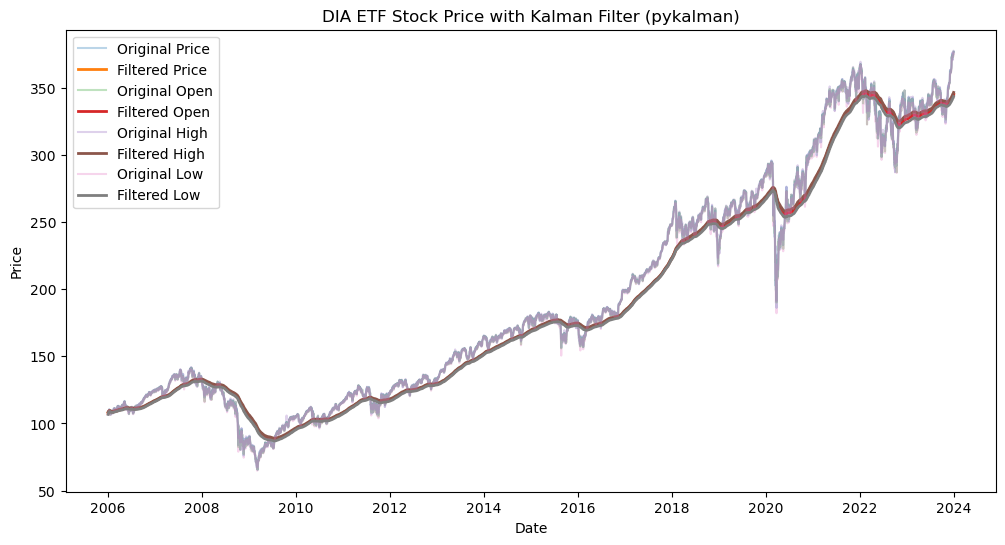

In [6]:
# 필요한 라이브러리 임포트
from pykalman import KalmanFilter

file_path = "./filtered_data/DIA ETF Stock Price History.csv"
df_dia = pd.read_csv(file_path)

df_dia["Date"] = pd.to_datetime(df_dia["Date"])
df_dia = df_dia.sort_values(by="Date")

# 칼만 필터를 적용할 주요 특성 선택
selected_features = ["Price", "Open", "High", "Low"]

# 필터링된 데이터를 저장할 데이터프레임 생성
filtered_data_pykalman = df_dia.copy()

# 칼만 필터 적용 함수 정의
def apply_kalman_filter(data):
    kf = KalmanFilter(initial_state_mean=data[0], 
                      n_dim_obs=1,
                      transition_matrices=[1], 
                      observation_matrices=[1],
                      transition_covariance=1e-5,  # 프로세스 노이즈 공분산
                      observation_covariance=0.1)  # 측정 노이즈 공분산
    
    # 필터 적용
    state_means, _ = kf.filter(data)
    return state_means.flatten()

# 모든 선택된 변수에 칼만 필터 적용
for feature in selected_features:
    filtered_data_pykalman[feature] = apply_kalman_filter(df_dia[feature].values)

# 결과 시각화 (원본 데이터 vs 칼만 필터 적용 데이터)
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.plot(df_dia["Date"], df_dia[feature], alpha=0.3, label=f"Original {feature}")
    plt.plot(df_dia["Date"], filtered_data_pykalman[feature], label=f"Filtered {feature}", linewidth=2)

plt.legend()
plt.title("DIA ETF Stock Price with Kalman Filter (pykalman)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [7]:
print(filtered_data_pykalman.isnull().sum())
filtered_data_pykalman.to_csv("./Kalman_filtered_data/k_filtered_DIA.csv", index=False)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


# Gold

In [8]:
# 필요한 라이브러리 임포트
from pykalman import KalmanFilter

file_path = "./filtered_data/Gold Futures Historical Data.csv"
df_gold = pd.read_csv(file_path)

df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4471 non-null   object
 1   Price     4471 non-null   object
 2   Open      4471 non-null   object
 3   High      4471 non-null   object
 4   Low       4471 non-null   object
 5   Vol.      4471 non-null   object
 6   Change %  4471 non-null   object
dtypes: object(7)
memory usage: 244.6+ KB


In [9]:
df_gold["Date"] = pd.to_datetime(df_gold["Date"])
df_gold = df_gold.sort_values(by="Date")

# 수치 데이터 문자열을 float로 변환 (콤마 제거 후 변환)
selected_features = ["Price", "Open", "High", "Low"]
for feature in selected_features:
    df_gold[feature] = df_gold[feature].replace(',', '', regex=True).astype(float)

# 거래량(Vol.) 데이터를 숫자로 변환하는 함수
def convert_to_numeric(value):
    value = value.replace(',', '')  # 쉼표 제거
    if 'K' in value:
        return float(value.replace('K', '')) * 1_000  # K(천 단위) 변환
    elif 'M' in value:
        return float(value.replace('M', '')) * 1_000_000  # M(백만 단위) 변환
    else:
        return float(value)  # 그냥 숫자인 경우 변환

# 거래량(Vol.) 데이터 변환
if "Vol." in df_gold.columns:
    df_gold["Vol."] = df_gold["Vol."].apply(convert_to_numeric)



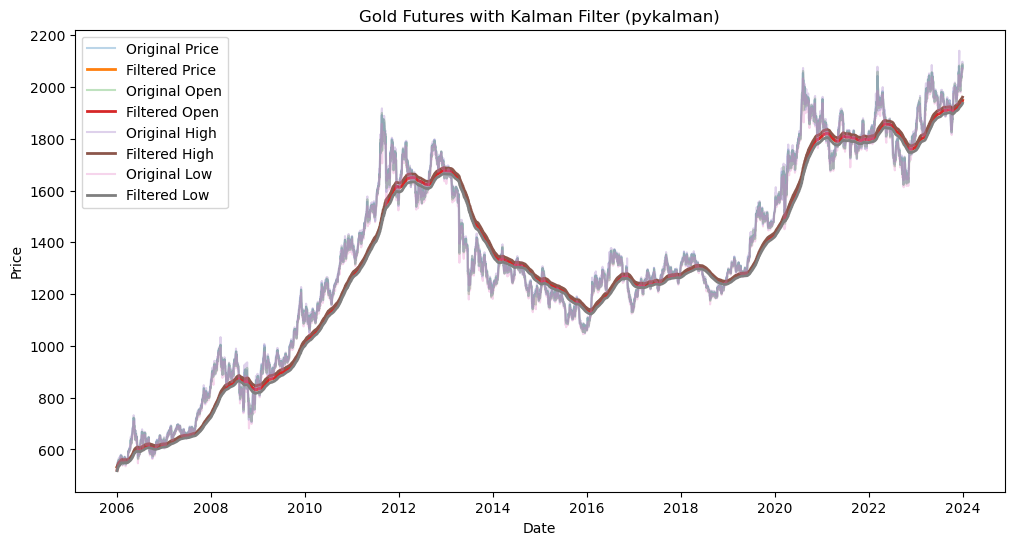

In [10]:
# 필터링된 데이터를 저장할 데이터프레임 생성
filtered_data_pykalman = df_gold.copy()

# 칼만 필터 적용 함수 정의
def apply_kalman_filter(data):
    kf = KalmanFilter(initial_state_mean=data[0], 
                      n_dim_obs=1,
                      transition_matrices=[1], 
                      observation_matrices=[1],
                      transition_covariance=1e-5,  # 프로세스 노이즈 공분산
                      observation_covariance=0.1)  # 측정 노이즈 공분산
    
    # 필터 적용
    state_means, _ = kf.filter(data)
    return state_means.flatten()

# 모든 선택된 변수에 칼만 필터 적용
for feature in selected_features:
    filtered_data_pykalman[feature] = apply_kalman_filter(df_gold[feature].values)

# 결과 시각화 (원본 데이터 vs 칼만 필터 적용 데이터)
plt.figure(figsize=(12, 6))
for feature in selected_features:
    plt.plot(df_gold["Date"], df_gold[feature], alpha=0.3, label=f"Original {feature}")
    plt.plot(df_gold["Date"], filtered_data_pykalman[feature], label=f"Filtered {feature}", linewidth=2)

plt.legend()
plt.title("Gold Futures with Kalman Filter (pykalman)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [11]:
print(filtered_data_pykalman.isnull().sum())
filtered_data_pykalman.to_csv("./Kalman_filtered_data/k_filtered_Gold.csv", index=False)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


# QQQ

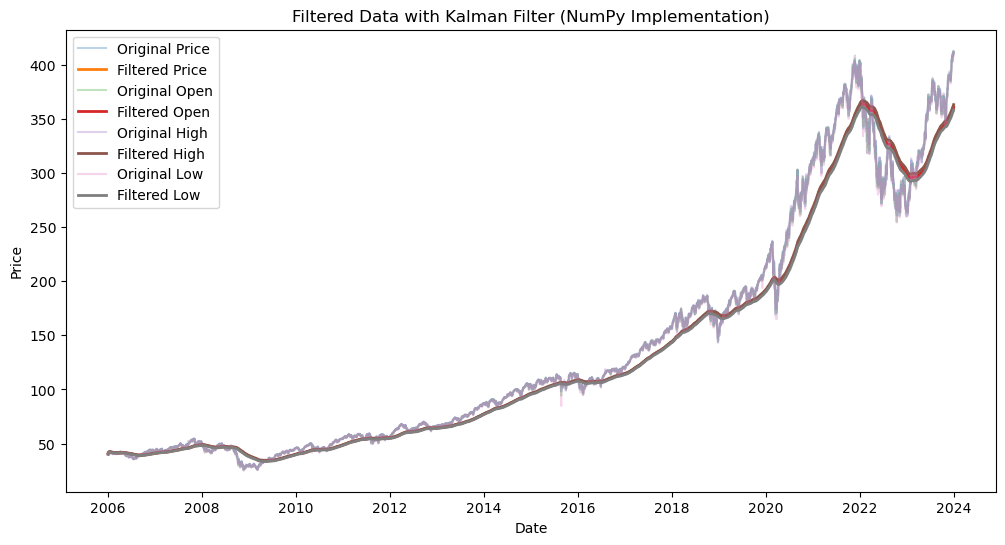

In [12]:
from Kalman_filter import preprocess_and_apply_kalman

# 함수 실행 예제
file_path = "./filtered_data/QQQ ETF Stock Price History.csv"
output_path = "./Kalman_filtered_data/k_filtered_QQQ.csv"
selected_features = ["Price", "Open", "High", "Low"]

# 실행
filtered_result = preprocess_and_apply_kalman(file_path, output_path, selected_features)

# SPY

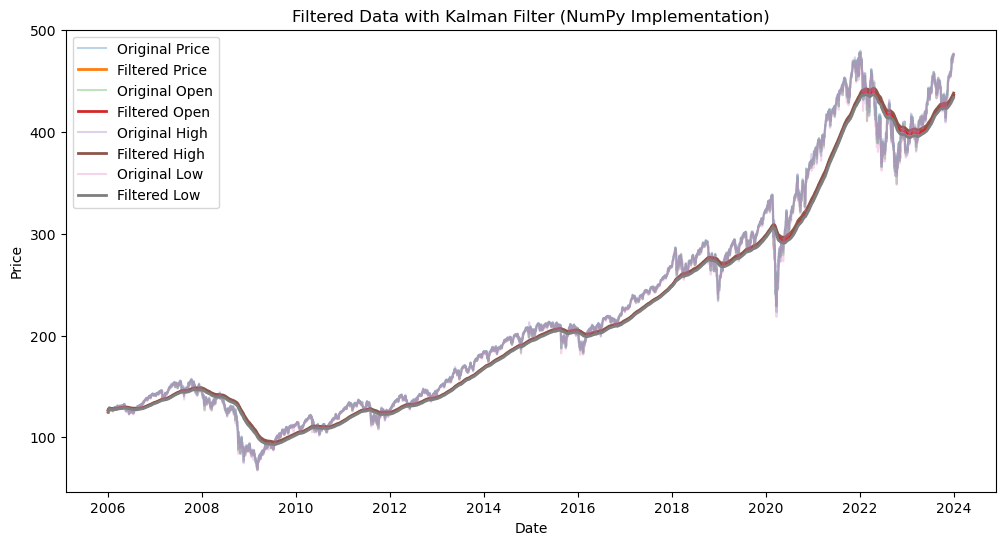

In [13]:
from Kalman_filter import preprocess_and_apply_kalman

# 함수 실행 예제
file_path = "./filtered_data/SPY ETF Stock Price History.csv"
output_path = "./Kalman_filtered_data/k_filtered_SPY.csv"
selected_features = ["Price", "Open", "High", "Low"]

# 실행
filtered_result = preprocess_and_apply_kalman(file_path, output_path, selected_features)

# US_10

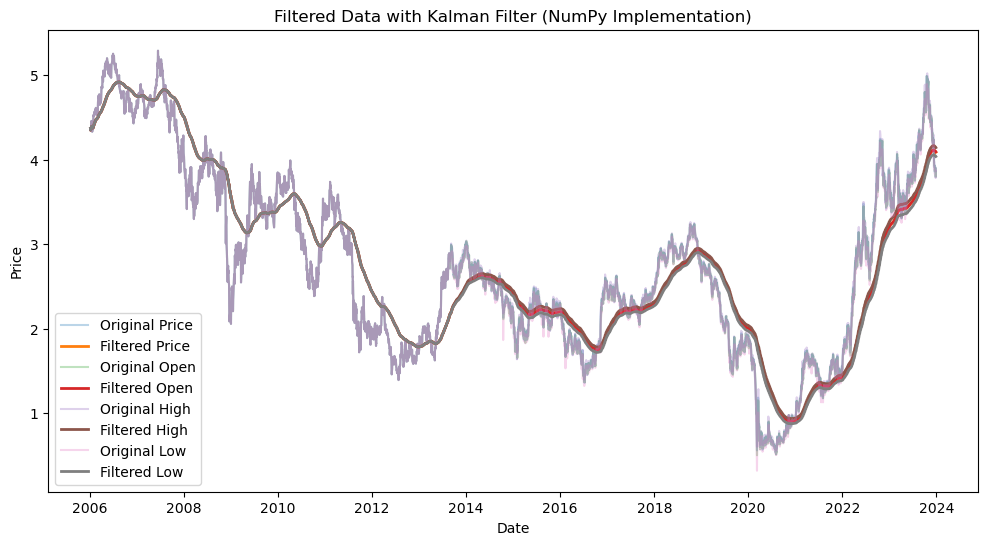

In [14]:
from Kalman_filter import preprocess_and_apply_kalman

# 함수 실행 예제
file_path = "./filtered_data/United States 10-Year Bond Yield Historical Data.csv"
output_path = "./Kalman_filtered_data/k_filtered_US10-Year_Bond.csv"
selected_features = ["Price", "Open", "High", "Low"]

# 실행
filtered_result = preprocess_and_apply_kalman(file_path, output_path, selected_features)

# USD_KRW

In [15]:
import pandas as pd

file_path = "./filtered_data/USD_KRW Historical Data.csv"
df_usd_krw = pd.read_csv(file_path)

df_usd_krw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4471 non-null   object 
 1   Price     4471 non-null   object 
 2   Open      4471 non-null   object 
 3   High      4471 non-null   object 
 4   Low       4471 non-null   object 
 5   Vol.      0 non-null      float64
 6   Change %  4471 non-null   object 
dtypes: float64(1), object(6)
memory usage: 244.6+ KB


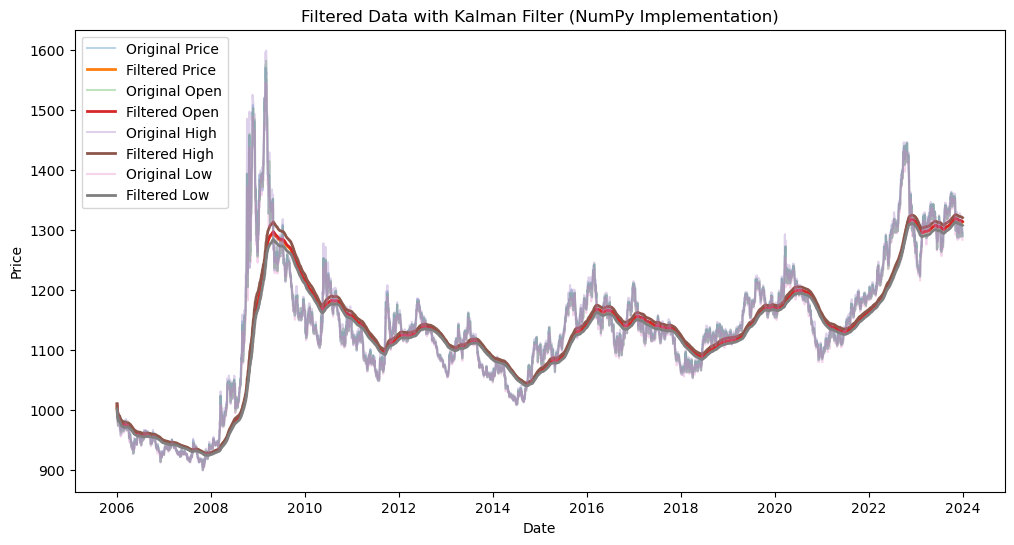

In [16]:
from Kalman_filter import preprocess_and_apply_kalman

# 함수 실행 예제
file_path = "./filtered_data/USD_KRW Historical Data.csv"
output_path = "./Kalman_filtered_data/k_filtered_USD_KRW.csv"
selected_features = ["Price", "Open", "High", "Low"]

# 실행
filtered_result = preprocess_and_apply_kalman(file_path, output_path, selected_features)

# VIX

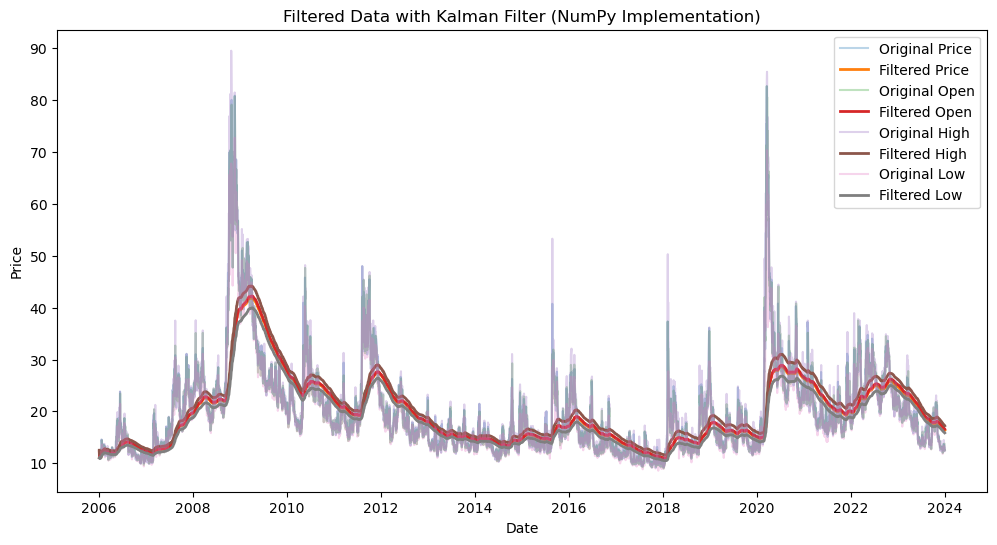

In [17]:
from Kalman_filter import preprocess_and_apply_kalman

# 함수 실행 예제
file_path = "./filtered_data/CBOE Volatility Index Historical Data.csv"
output_path = "./Kalman_filtered_data/k_filtered_VIX.csv"
selected_features = ["Price", "Open", "High", "Low"]

# 실행
filtered_result = preprocess_and_apply_kalman(file_path, output_path, selected_features)